In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import PIL
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader


In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(f"Using Pytorch v{torch.__version__}, Device: {DEVICE}")

Using Pytorch v2.0.0, Device: cuda


In [4]:
cifar = datasets.CIFAR10(root="./CIFAR_10", train=True, download=True)

100%|██████████| 170498071/170498071 [00:12<00:00, 14183396.27it/s]


Extracting ./CIFAR_10/cifar-10-python.tar.gz to ./CIFAR_10


In [5]:
print(cifar[0])

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7C47E609F790>, 6)


## Visualize the 5th element of the cifar10 train dataset with its label.
- hint 1: Use plt.imshow() func to visualize the image.
- hint 2: Use CIFAR10_LABEL to extract the label. With the given label index in the dataset, you can extract the label.

In [6]:
CIFAR10_LABEL = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

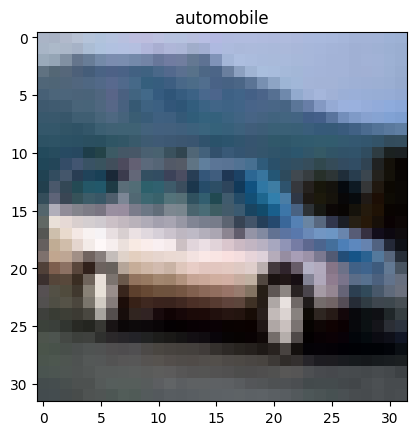

In [7]:
plt.imshow(cifar[4][0])
plt.title(CIFAR10_LABEL[cifar.targets[4]])


def plot_image(image: PIL.Image.Image, label: str):
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

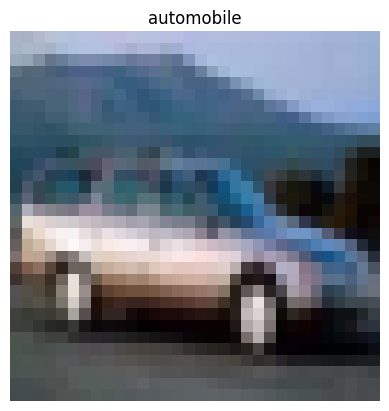

In [8]:
for i in range(5):
    plot_image(cifar[i][0], CIFAR10_LABEL[cifar.targets[i]])

## Custom Dataset

In [9]:
'''
CIFAR10 데이터셋 커스터 마이징
'''
class CustomDataset(Dataset):
    def __init__(self, train, data_dir='./CIFAR_10_Custom'):
        self.data = datasets.CIFAR10(root=data_dir, train=train, download=True)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]


In [10]:
train_dataset = CustomDataset(train=True)

100%|██████████| 170498071/170498071 [00:11<00:00, 14231259.10it/s]


Extracting ./CIFAR_10_Custom/cifar-10-python.tar.gz to ./CIFAR_10_Custom


In [11]:
test_dataset = CustomDataset(train=False)

Files already downloaded and verified


<Image no.0>
torch.Size([3, 32, 32])
frog
<Image no.1>
torch.Size([3, 32, 32])
truck
<Image no.2>
torch.Size([3, 32, 32])
truck
<Image no.3>
torch.Size([3, 32, 32])
deer


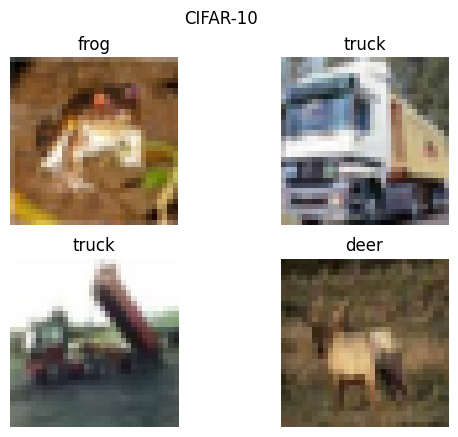

In [12]:
fig = plt.figure()
plt.suptitle('CIFAR-10')
for i in range(4):
    print(f"<Image no.{i}>")
    
    image, label_idx = train_dataset[i]
    label = CIFAR10_LABEL[label_idx]
    
    plt.subplot(2,2,i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
    
    toTensor = transforms.ToTensor()
    image = toTensor(image)
    
    print(image.shape)
    
    print(label)